### DATA IMPORTATION

In [25]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [26]:
ads= pd.read_csv('advertising.csv')
ads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### DATA EXPLORATION

In [27]:
ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


The sales values ranges from 1 to 21 and it peaks at 15 on most days

In [28]:
# Checking for null and duplicated values
print(ads.isna().sum())
print(ads.duplicated().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
0


There are no null values or duplicated values in this dataset

<Axes: >

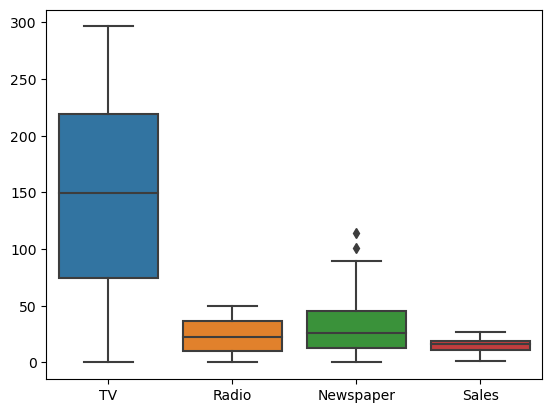

In [29]:
#checking for outliers
sns.boxplot(ads)

The data set has no significat outlier i.e no value seems outragously high or low

### EDA

Text(0.5, 1.0, 'Sales By Newspaper Ads')

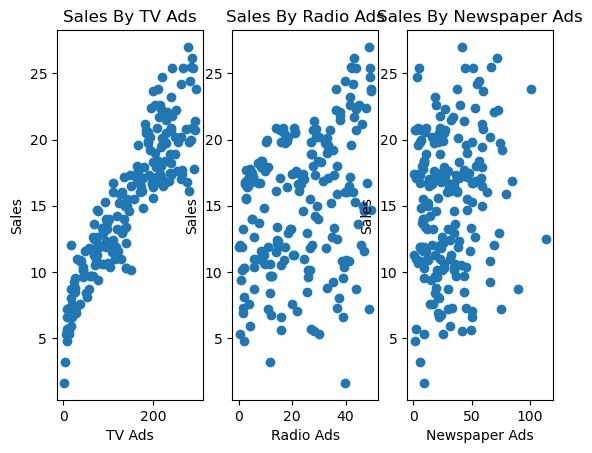

In [30]:
# checking the sales trend in response to the ads placed
plt.figure(10)
plt.subplot(1,3,1)
plt.scatter(data=ads, x='TV', y='Sales')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.title('Sales By TV Ads')

plt.subplot(1,3,2)
plt.scatter(data=ads, x='Radio', y='Sales')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')
plt.title('Sales By Radio Ads')

plt.subplot(1,3,3)
plt.scatter(data=ads, x='Newspaper', y='Sales')
plt.xlabel('Newspaper Ads')
plt.ylabel('Sales')
plt.title('Sales By Newspaper Ads')

<Axes: >

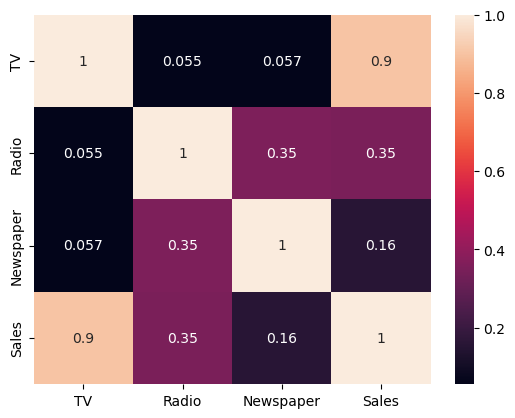

In [31]:
#checking for correlations between all values
corr = ads.corr()
sns.heatmap(corr, annot=True)

### DATA MODELLING

In [32]:
# Spliting data into test and train
X= np.array(ads['Sales']).reshape(-1,1)
y= ads.drop(columns='Sales')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Calling the model
lr_model = LinearRegression()

#Training the model
lr_model.fit(X_train,y_train)

#Predicting using the model
y_pred_lr = lr_model.predict(X_test)

In [35]:
#calculating the MSE, MAE and R-score of the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rscore_lr = r2_score(y_test,y_pred_lr)

Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

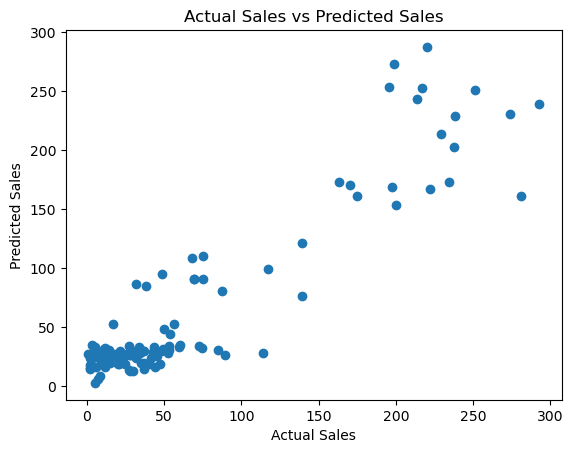

In [36]:
#Visualizing the model performance
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')

In [37]:
#Calling the model
dtr_model = DecisionTreeRegressor(random_state=42)

#Training the model
dtr_model.fit(X_train,y_train)

#Predicting using the model
y_pred_dtr = dtr_model.predict(X_test)

In [38]:
#calculating the MSE, MAE and R-score of the model
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
rscore_dtr = r2_score(y_test,y_pred_dtr)

Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

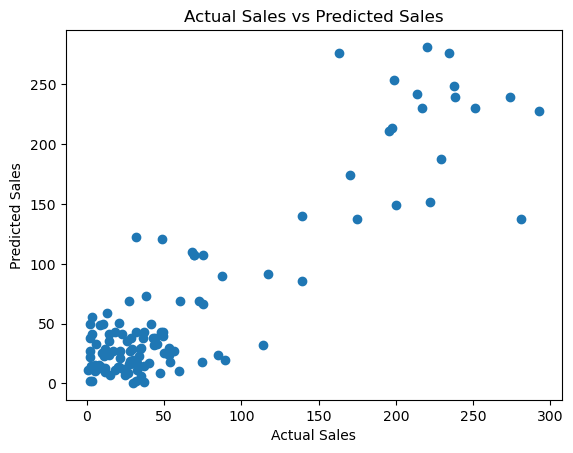

In [39]:
#Visualizing the model performance
plt.scatter(y_test,y_pred_dtr)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')

In [40]:
metrics = {'Metric': ['MSE', 'MAE', 'R2'],
          'Linear': [mse_lr, mae_lr, rscore_lr],
          'Decision Tree':[mse_dtr, mae_dtr, rscore_dtr]}
metrics = pd.DataFrame(metrics)
metrics

,Metric,Linear,Decision Tree
0,MSE,831.433283,1176.308039
1,MAE,20.680841,24.622708
2,R2,0.315022,-0.072671
